In [1]:
import nltk
import spacy
import pandas as pd

nlp = spacy.load('en') #loading English


#opening csv
myfile = open('/home/user/Complaint/MakeComplaint/data.csv').read()
data=nlp(myfile)

#df=pd.DataFrame(data=data)
#df=nlp(df)
#print(df)
print(type(data))
for token in data[:8]:
    print(token.text)
#fetching the headers

#for colname in frames:
    #print(colname.columns)
    
    
    
#keys = ['Water Authority','KSEB','KSRTC','PWD','Environment and climate change','MVD']
#df=pd.concat(frames,keys=keys)
#df



#print(doc_file)

#tokenizer=nltk.tokenize.TreebankWordTokenizer()
#tokens=tokenizer.tokenize(text)
#print("Tree", tokens)

<class 'spacy.tokens.doc.Doc'>
id
,
Subject
,
Complaint
,
Departments




In [75]:
import pandas as pd
import matplotlib.pyplot as plt

dataset= pd.read_csv('/home/user/Complaint/MakeComplaint/data1.csv')
dataset['Departments'].unique() 

array(['Water Authority', 'PWD', 'KSEB', 'KSRTC',
       'Environment and climate change'], dtype=object)

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

dataset= pd.read_csv('/home/user/Complaint/MakeComplaint/data.csv')

dataset.head()






,id,Subject,Complaint,Departments
0,1,No water supply connection.,No water pipeline connection in amma gardens r...,Water Authority
1,2,Road re tarring.\n,I am a resident of sreekaryam Aambad Nnagar l...,PWD
2,3,Power cuts without a prior notice.,As everyone knows that electricity is the majo...,KSEB
3,4,Scarcity of water in day time.,There is scarcity of water in my area Vanchiyo...,Water Authority
4,5,Water scarcity,There is a huge scarcity of water in remote ar...,Water Authority


(-1.1301379412467927,
 1.1014351540814555,
 -1.1112390741602463,
 1.1125073680366944)

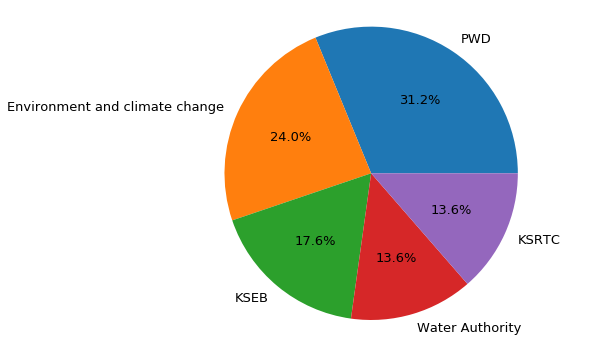

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

dataset= pd.read_csv('/home/user/Complaint/MakeComplaint/data1.csv')




dataset.Departments.value_counts().plot(kind='pie', 
                                  figsize=(8,6), 
                                  fontsize=13, 
                                  autopct='%1.1f%%', 
                                  wedgeprops={'linewidth': 5}
                                  )
plt.axis('off')
plt.axis('equal')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords 
import nltk
from nltk.tokenize import word_tokenize 


#Data cleaning

# 1. unpunctuate 
# 2. to lower
# 3. Remove numerals
# 4. Remove Newline for subject


# Data loading
dataset= pd.read_csv('/home/user/Complaint/MakeComplaint/data1.csv')


# unpunctuate and lower case
dataset['Subject'] = dataset['Subject'].str.replace('[^\w\s]','').str.lower()


# unpunctuate and lower case
dataset['Complaint'] = dataset['Complaint'].str.replace('[^\w\s]','').str.lower() 


#rRemoving new lines in the subject field
dataset['Subject'] = dataset['Subject'].str.rstrip('\n')

#removing Numeric 
dataset['Complaint'] = dataset['Complaint'].str.replace('[^a-zA-Z ]','').str.lower()



# creating dataframe for each departments
water = dataset.loc[dataset['Departments'] == 'Water Authority']
pwd = dataset.loc[dataset['Departments'] == 'PWD']
ksrtc = dataset.loc[dataset['Departments'] == 'KSRTC']
kseb = dataset.loc[dataset['Departments'] == 'KSEB']
env = dataset.loc[dataset['Departments'] == 'Environment and climate change']

#print(env.shape)    #(29, 4)
#print(water.shape)  #(17, 4)
#print(pwd.shape)    #(39, 4)
#print(ksrtc.shape)  #(13, 4)
#print(kseb.shape)   #(22, 4)
#dataset.head()
#print(pwd)

#Filtering out Subjects and complaints from the dataframe
df_water = water[['Subject','Complaint']]
df_pwd   = pwd[['Subject','Complaint']]
df_ksrtc = ksrtc[['Subject','Complaint']]
df_kseb  = kseb[['Subject','Complaint']]
df_env   = env[['Subject','Complaint']]

dfwater  = df_water[['Subject','Complaint']]
dfpwd    = df_pwd[['Subject','Complaint']]
dfksrtc  = df_ksrtc[['Subject','Complaint']]
dfkseb   = df_kseb[['Subject','Complaint']]
dfenv    = df_env[['Subject','Complaint']]


#Dataframe with complaint and subject as one column = Water
dfwater['Subject_and_Complaint'] = df_water['Subject'] + " "+ df_water['Complaint']
dfwater=dfwater[['Subject_and_Complaint']]





#Dataframe with complaint and subject as one column = PWD
dfpwd['Subject_and_Complaint'] = df_pwd['Subject'] + " "+ df_pwd['Complaint']
dfpwd=dfpwd[['Subject_and_Complaint']]
#print(dfpwd)

#Dataframe with complaint and subject as one column = ksrtc
dfksrtc['Subject_and_Complaint'] = df_ksrtc['Subject'] + " "+ df_ksrtc['Complaint']
dfksrtc=dfksrtc[['Subject_and_Complaint']]
#print(dfksrtc)

#Dataframe with complaint and subject as one column = kseb
dfkseb['Subject_and_Complaint'] = df_kseb['Subject'] + " "+ df_kseb['Complaint']
dfkseb=dfkseb[['Subject_and_Complaint']]
#print(dfkseb)


#Dataframe with complaint and subject as one column = env
dfenv ['Subject_and_Complaint'] = df_env['Subject'] + " "+ df_env['Complaint']
dfenv =dfenv [['Subject_and_Complaint']]
#print(dfenv )

#==================================Tokenization Begins : =============================================


                     


water_token = []
#Tokenising water data
stop_words = set(stopwords.words('english'))
for i, row in dfwater.iterrows():
    #print(i,row['Subject'], row['Complaint'])
    #tokenizer=nltk.tokenize.TreebankWordTokenizer()
    water_token = word_tokenize(row['Subject_and_Complaint'])
    result = [i for i in water_token if not i in stop_words]
    print(result)
    #water_token.append(tokenizer.tokenize(row['Subject_and_Complaint']))

   
   

#print(type(tokens))



pwd_token = []
#Tokenising pwd data    
for i, row in dfpwd.iterrows():
    #print(i,row['Subject'], row['Complaint'])
    tokenizer=nltk.tokenize.TreebankWordTokenizer()
    pwd_token.append(tokenizer.tokenize(row['Subject_and_Complaint']))
#print( pwd_token)

ksrtc_token =[]
#Tokenising ksrtc data    
for i, row in dfksrtc.iterrows():
    #print(i,row['Subject'], row['Complaint'])
    tokenizer=nltk.tokenize.TreebankWordTokenizer()
    ksrtc_token.append(tokenizer.tokenize(row['Subject_and_Complaint']))
#print( ksrtc_token)

kseb_token = []
#Tokenising kseb data    
for i, row in dfkseb.iterrows():
    #print(i,row['Subject'], row['Complaint'])
    tokenizer=nltk.tokenize.TreebankWordTokenizer()
    kseb_token.append(tokenizer.tokenize(row['Subject_and_Complaint']))
#print(kseb_token)

env_token = []
#Tokenising env data    
for i, row in dfenv.iterrows():
    #print(i,row['Subject'], row['Complaint'])
    tokenizer=nltk.tokenize.TreebankWordTokenizer()
    env_token.append(tokenizer.tokenize(row['Subject_and_Complaint']))
#print(env_token)
    



    

['water', 'supply', 'connection', 'water', 'pipeline', 'connection', 'amma', 'gardens', 'residential', 'area', 'erattakalangu', 'malayinkeezhu']
['scarcity', 'water', 'day', 'time', 'scarcity', 'water', 'area', 'vanchiyooron', 'day', 'time', 'creates', 'great', 'trouble', 'people', 'getting', 'ready', 'work', 'schools', 'office', 'etc']
['water', 'scarcity', 'huge', 'scarcity', 'water', 'remote', 'areas', 'people', 'walk', 'large', 'distancesstanding', 'queue', 'fetch', 'water', 'problem', 'exiss', 'hilly', 'areas', 'idukki', 'district', 'kerala', 'si', 'humbly', 'request', 'take', 'necessary', 'actions', 'tackle', 'problem', 'near', 'future']
['water', 'scarcity', 'frequent', 'scarcity', 'water', 'morning']
['water', 'supply', 'available', 'houses', 'area', 'water', 'supply', 'available', 'therepeople', 'get', 'water', 'needs', 'therefore', 'request', 'concerning', 'authorities', 'look', 'matter', 'seriously', 'take', 'necessary', 'steps', 'solving', 'problem', 'water', 'supply', 'may